<a href="https://colab.research.google.com/github/vanmai07/data-analysis-basic/blob/main/Olist_The%20Brazillian%20E-commerce%20platform%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
order = pd.read_csv('https://raw.githubusercontent.com/anhquan0412/dataset/main/Brazillian_Ecommerce/olist_orders_dataset.csv')
order_items = pd.read_csv('https://raw.githubusercontent.com/anhquan0412/dataset/main/Brazillian_Ecommerce/olist_order_items_dataset.csv')
order_payments = pd.read_csv('https://raw.githubusercontent.com/anhquan0412/dataset/main/Brazillian_Ecommerce/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('https://raw.githubusercontent.com/anhquan0412/dataset/main/Brazillian_Ecommerce/olist_order_reviews_dataset.csv')

In [ ]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
#ORDER - DELIVERY PROCESS Analysis
#Aiming for optimization
#Question to be answered
#1 - mối tương quan giữa order process (timing) và revenue (dự đoán là do shipping time)
#2 - tìm ra vấn đề & đề xuất giải pháp
#cần define nếu actual delivery date under expected date or limit date thì mới là vde nhóe hahahahhaha

In [ ]:
#Create dataframe from 10/2016 to 08/2018
order_process = pd.merge(left=order, 
                          right=order_items, 
                          on='order_id',
                          how='inner')
order_process = order_process[order_process['order_purchase_timestamp'] > '2016-10']
order_process = order_process[order_process['order_purchase_timestamp'] < '2018-08']
order_process = order_process.rename(columns={"order_status": "status", "order_item_id": "qty", "order_purchase_timestamp": "purchase_timestamp", "order_approved_at": "approved_at", "order_delivered_carrier_date": "delivered_carrier_date","order_delivered_customer_date": "delivered_customer_date", "order_estimated_delivery_date": "estimated_delivery_date"})
order_process.head()

,order_id,customer_id,status,purchase_timestamp,approved_at,delivered_carrier_date,delivered_customer_date,estimated_delivery_date,qty,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,1,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.90,27.36


In [ ]:
order_process.info()

In [ ]:
#date type reset
#note estimated date using as expected delivery date to end consumer
#note shipping limit date using as cut-off time for supplier and shipper
order_process['purchase_timestamp'] = pd.to_datetime(order_process['purchase_timestamp'])
order_process['approved_at'] = pd.to_datetime(order_process['approved_at'])
order_process['delivered_carrier_date'] = pd.to_datetime(order_process['delivered_carrier_date'])
order_process['delivered_customer_date'] = pd.to_datetime(order_process['delivered_customer_date'])
order_process['estimated_delivery_date'] = pd.to_datetime(order_process['estimated_delivery_date'])
order_process['shipping_limit_date'] = pd.to_datetime(order_process['shipping_limit_date'])
order_process.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105395 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_id                 105395 non-null  object        
 1   customer_id              105395 non-null  object        
 2   status                   105395 non-null  object        
 3   purchase_timestamp       105395 non-null  datetime64[ns]
 4   approved_at              105380 non-null  datetime64[ns]
 5   delivered_carrier_date   104259 non-null  datetime64[ns]
 6   delivered_customer_date  103051 non-null  datetime64[ns]
 7   estimated_delivery_date  105395 non-null  datetime64[ns]
 8   qty                      105395 non-null  int64         
 9   product_id               105395 non-null  object        
 10  seller_id                105395 non-null  object        
 11  shipping_limit_date      105395 non-null  datetime64[ns]
 12  price           

In [ ]:
#Year-Month for revenue
order_process['purchase_timestamp'].dt.month

0         10
1          7
3         11
4          2
5          7
          ..
112645     2
112646     8
112647     1
112648     1
112649     3
Name: purchase_timestamp, Length: 105395, dtype: int64

In [ ]:
order_process['purchase_timestamp'] = order_process['purchase_timestamp'].dt.to_period('M')

In [ ]:
order_process.head()

,order_id,customer_id,status,purchase_timestamp,approved_at,delivered_carrier_date,delivered_customer_date,estimated_delivery_date,qty,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,1,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.90,27.36


In [ ]:
plot_data = order_process.groupby('purchase_timestamp')['price'].sum().reset_index()

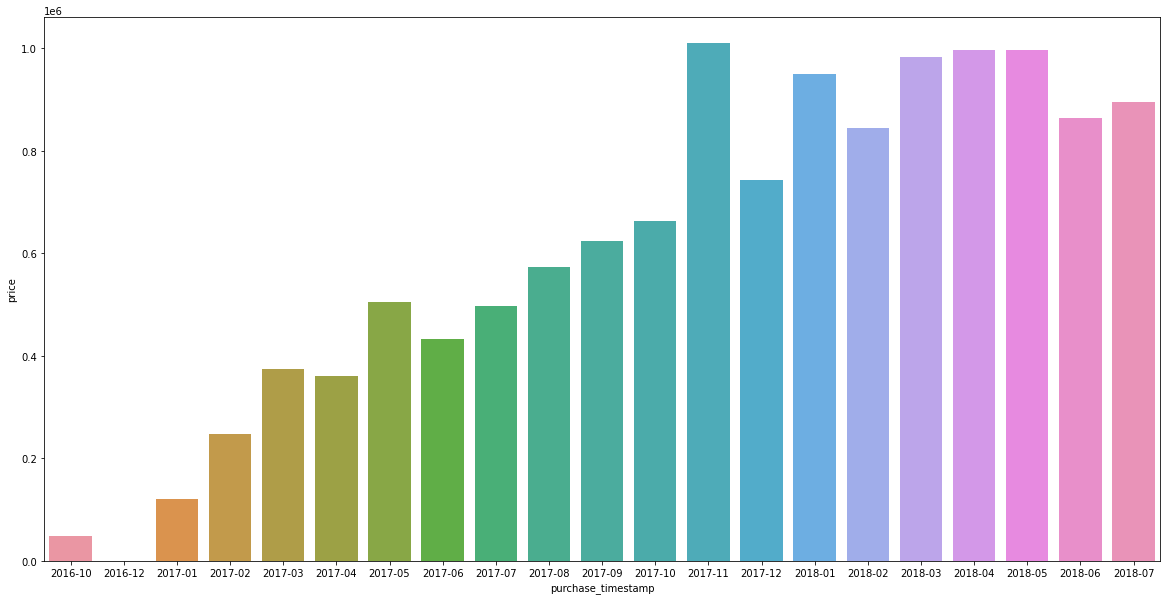

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=plot_data,
            x='purchase_timestamp',
            y='price')

In [ ]:
order_process.groupby('purchase_timestamp')['order_id'].count().reset_index()

,purchase_timestamp,order_id
0,2016-10,363
1,2016-12,1
2,2017-01,955
3,2017-02,1951
4,2017-03,3000
5,2017-04,2684
6,2017-05,4136
7,2017-06,3583
8,2017-07,4519
9,2017-08,4910


In [ ]:
#Year-Month-Date for order & delivery process
order_process['purchase_timestamp'] = order_process['order_purchase_timestamp'].dt.to_period('D')

In [ ]:
#tính duration giữa các công đoạn trong quy trình từ lúc nhận order đến lúc deliver tới end customer
#work in progress
order_process['approval'] = order_process['approved_at'] - order_process['purchase_timestamp']
order_process['processing'] = order_process['delivered_carrier_date'] - order_process['approved_at']
order_process['shipping'] = order_process['delivered_customer_date'] - order_process['delivered_carrier_date']
#comparision
order_process['actual_process'] = order_process['delivered_customer_date'] - order_process['purchase_timestamp']
order_process['estimated_delivery_date'] = order_process['estimated_delivery_date'] - order_process['purchase_timestamp']
order_process['limited_shipping_date'] = order_process['shipping_limit_date'] - order_process['delivered_carrier_date']
time_tracking = order_process[['approval', 'processing', 'shipping', 'actual_process', 'estimated_delivery_date', 'limited_shipping_date']]
time_tracking

,approval,processing,shipping,actual_process,estimated_delivery_date,limited_shipping_date
0,0 days 00:10:42,2 days 08:47:45,6 days 01:30:13,8 days 10:28:40,15 days 13:03:27,1 days 15:12:15
1,1 days 06:42:50,0 days 11:06:33,12 days 00:56:45,13 days 18:46:08,19 days 03:18:23,3 days 12:53:27
3,0 days 00:17:53,3 days 17:54:00,9 days 10:48:43,13 days 05:00:36,26 days 04:31:54,1 days 06:06:00
4,0 days 01:01:50,0 days 21:26:05,1 days 22:30:28,2 days 20:58:23,12 days 02:41:21,5 days 00:45:03
5,0 days 00:13:08,1 days 16:47:51,14 days 19:59:51,16 days 13:00:50,22 days 02:02:55,2 days 07:12:09
...,...,...,...,...,...,...
112645,0 days 00:11:39,1 days 10:12:05,20 days 18:15:14,22 days 04:38:58,23 days 11:01:02,4 days 13:47:55
112646,0 days 00:17:33,1 days 05:48:10,23 days 14:31:51,24 days 20:37:34,30 days 09:13:17,7 days 18:11:50
112647,0 days 00:07:54,3 days 17:58:42,13 days 07:57:51,17 days 02:04:27,37 days 02:31:33,0 days 06:01:18
112648,0 days 00:07:54,3 days 17:58:42,13 days 07:57:51,17 days 02:04:27,37 days 02:31:33,0 days 06:01:18


In [ ]:
order_process['status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'canceled',
       'unavailable', 'approved'], dtype=object)

In [ ]:
#Subset dataframe
order_process1 = order_process[['order_id', 'status', 'qty','seller_id', 'price', 'actual_process', 'estimated_delivery_date', 'limited_shipping_date', 'freight_value']]
order_process1 = order_process1[(order_process1['status'] != 'canceled') & (order_process1['status'] != 'unavailable')]
order_process1.head()

,order_id,status,qty,seller_id,price,actual_process,estimated_delivery_date,limited_shipping_date,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,1,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8 days 10:28:40,15 days 13:03:27,1 days 15:12:15,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,1,289cdb325fb7e7f891c38608bf9e0962,118.70,13 days 18:46:08,19 days 03:18:23,3 days 12:53:27,22.76
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,1,66922902710d126a0e7d26b0e3805106,45.00,13 days 05:00:36,26 days 04:31:54,1 days 06:06:00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,1,2c9e548be18521d1c43cde1c582c6de8,19.90,2 days 20:58:23,12 days 02:41:21,5 days 00:45:03,8.72
5,a4591c265e18cb1dcee52889e2d8acc3,delivered,1,8581055ce74af1daba164fdbd55a40de,147.90,16 days 13:00:50,22 days 02:02:55,2 days 07:12:09,27.36


In [ ]:
#HYPOTHESIS
#1_By delivery
#2_By Freight value
#3_By seller capacity

In [ ]:
H1 = order_process1[['order_id', 'status', 'seller_id', 'actual_process', 'estimated_delivery_date']]
H1 = H1[H1['status'] == 'invoiced']
H1.head()

In [ ]:
#Xác định tỷ lệ trễ (compare actual process w expected delivery date)
#Xác định nguyên nhân trễ (so sánh actual time vs shipping limit date => nếu phải thì là do shipper => nếu ko phải thì là do hệ thống hoặc seller)
#Xác định tương quan revenue với các đơn trễ
#Xác đinh tương quan các đơn trễ với review 

In [ ]:
#CONCLUSION_1
#By delivery

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(data=order_process1,
              x='status',
              y='freight_value')

In [ ]:
#CONCLUSION_2
#By freight value

In [ ]:
order_process1['status'].value_counts()

delivered      110197
shipped          1186
canceled          706
unavailable       610
invoiced          361
processing        357
created             5
approved            3
Name: status, dtype: int64

In [ ]:
#CONCLUSION_3
#By seller capacity
#1.16% order is canceled or unavailable ==> This is not the reason

In [ ]:
#CUSTOMER SATISFACTION

In [ ]:
consumer_review = pd.merge(left=order_process, 
                          right=order_reviews, 
                          on='order_id',
                          how='inner')
consumer_review

In [ ]:
#PAYMENT METHOD Analysis
#Question to be answered
#1 - Các phương thức thanh toán mà sàn e-comm cung cấp là gì?
#2a - Phương thức thanh toán nào có số lần order nhiều nhất? categoried by new order (sequential = 0) và retunr oder (sequential = 1)
#2b - Phương thức thanh toán nào contribute revenue nhiều nhất? 
#2c => Mối tương quan giữa phương thức thanh toán và revenue?
#3 - Phương thức thanh toán nào có số lần quay lại nhiều nhất? và giá trị thanh toán trung bình? (total giá trị thanh toán by type) => loyal customer 

In [ ]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
#1 Payment type
order_payments['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [ ]:
#2a - Phương thức thanh toán nào có số lần order nhiều nhất? categoried by new order (sequential = 1) và return oder (sequential != 1)
#2b - Phương thức thanh toán nào contribute revenue nhiều nhất?
order_payments['avg_value'] = order_payments['payment_value'] / order_payments['payment_sequential']
order_payments
order_payments.groupby('payment_type')[['payment_sequential', 'payment_value', 'avg_value']].agg({'payment_sequential':'sum', 
                                                                                    'payment_value':'sum',
                                                                                    'avg_value':'mean'}).reset_index()                                                
#2c => Mối tương quan giữa phương thức thanh toán và revenue?

,payment_type,payment_sequential,payment_value,avg_value
0,boleto,19785,2.869361e+06,145.032050
1,credit_card,77115,1.254208e+07,163.012189
2,debit_card,1582,2.179898e+05,140.242679
3,not_defined,3,0.000000e+00,0.000000
4,voucher,15029,3.794369e+05,44.956984


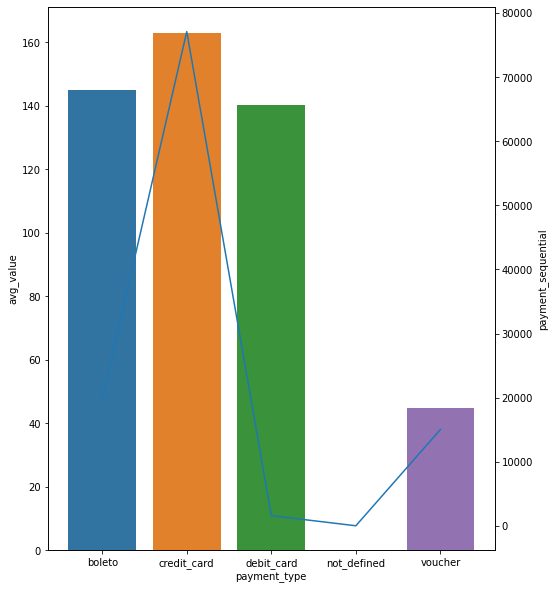

In [ ]:
order_payments['avg_value'] = order_payments['payment_value'] / order_payments['payment_sequential']
order_payments

plot_data = order_payments.groupby('payment_type')[['payment_sequential', 'avg_value']].agg({'payment_sequential':'sum', 
                                                                                      'avg_value':'mean'}).reset_index() 
plt.figure(figsize=(8, 10))
sns.barplot(data=plot_data,
              x='payment_type',
              y='avg_value')
plt.twinx()
sns.lineplot(data=plot_data,
             x='payment_type',
             y='payment_sequential')
plt.show()

In [ ]:
#CONCLUSION
#Mối tương quan giữa phương thức thanh toán và revenue?
#Credit card là phương thức thanh toán được ưa chuộng nhất & contribute doanh thu cao nhất vì cho phép người tiêu dùng trả sau
#loyal customer (quay lại ~ 20 lần) sử dụng voucher khá nhiều nhưng giá trị giao dịch trung bình và tổng số lần giao dịch không cao
#giá trị món hàng không quá ảnh hưởng đến quyết định mua hàng

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


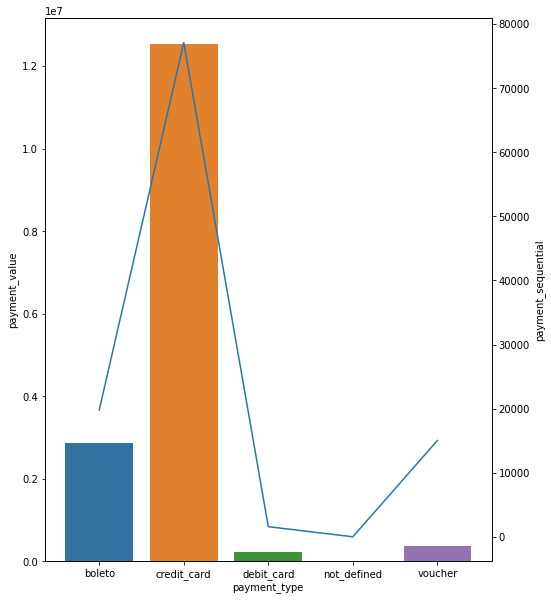

In [ ]:
plot_data = order_payments.groupby('payment_type')['payment_sequential', 'payment_value'].sum().reset_index() 
plt.figure(figsize=(8, 10))
sns.barplot(data=plot_data,
              x='payment_type',
              y='payment_value')
plt.twinx()
sns.lineplot(data=plot_data,
             x='payment_type',
             y='payment_sequential')
plt.show()

In [ ]:
#DRAFT
order_payments.groupby(['payment_type', 'payment_sequential'])['payment_value'].sum().reset_index()

,payment_type,payment_sequential,payment_value
0,boleto,1,2.869267e+06
1,boleto,2,9.440000e+01
2,credit_card,1,1.249499e+07
3,credit_card,2,4.698913e+04
4,credit_card,3,1.028200e+02
5,debit_card,1,2.108790e+05
6,debit_card,2,7.090800e+03
7,debit_card,3,2.000000e+01
8,not_defined,1,0.000000e+00
9,voucher,1,1.572037e+05


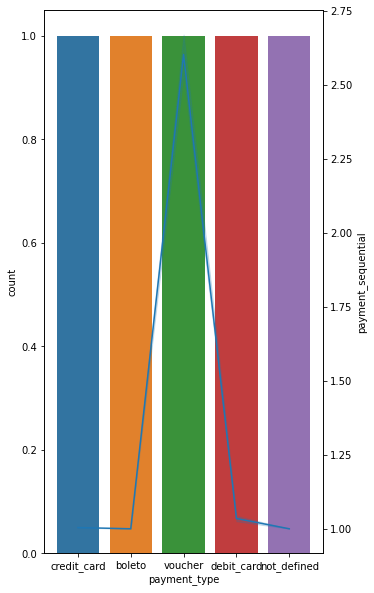

In [ ]:
#DRAFT
plot_data = order_payments.groupby('payment_type')['payment_value'].mean().reset_index()
plt.figure(figsize=(5, 10))
sns.countplot(data=plot_data,
              x='payment_type')
plt.twinx()
sns.lineplot(data=order_payments,
             x='payment_type',
             y='payment_sequential')
plt.show()